In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
import warnings
warnings.simplefilter('ignore')

In [65]:
#Loading the dataset into pandas
data=pd.read_csv(r'playstore-analysis (1).csv')

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [67]:
cat=data.Category.unique()
cat

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [68]:
#calling Dataset as data
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


#                                                 Task

### 1. Data clean up – Missing value treatment

  A. Drop records where rating is missing since rating is our target/study variable

In [69]:
#finding the null values in rating column
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [70]:
#Droping null values
data.dropna(how='any', subset=['Rating'], axis=0, inplace = True)

In [71]:
#checking null Value
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

  B.Check the null values for the Android Ver column. 

    i. Are all 3 records having the same problem?

In [72]:
#Checking Null Values in Android ver column
data.loc[data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.00000,"1,000+",Paid,$1.49,Everyone,Personalization,20-Jul-18,4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.00000,"10,000+",Free,0,Everyone,Personalization,27-Mar-18,1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.52952,Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


    ii.Drop the 3rd record i.e. record for “Life Made WIFI …”

In [73]:
#Droping the third row
data.drop([10472],inplace=True)

In [74]:
#Again checking for null values in anroid ver
data.loc[data['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,20-Jul-18,4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,27-Mar-18,1.1,NaN


    iii. Replace remaining missing values with the mode

In [75]:
#filling mode value in null values of android ver column
data['Android Ver'].fillna(data['Android Ver'].mode()[0],inplace=True)

In [76]:
#checking ISvalue Changed or not
data.loc[4453]['Android Ver']

'4.1 and up'

  C. Current ver – replace with most common value

In [77]:
data['Current Ver'].fillna(data['Current Ver'].mode()[0],inplace=True)

### 2. Data clean up – correcting the data types

  A. Which all variables need to be brought to numeric types?

B. Price variable – remove $ sign and convert to float

In [78]:
#Finding and assigning values for price column
price = []
for i in data['Price']:
    if i[0]=='$':
        price.append(i[1:])
    else:
        price.append(i)

In [80]:
#changing the datatype of price column to replacing string valkues to float
data.drop(labels=data[data['Price']=='Everyone'].index, inplace = True)
data['Price']= price
data['Price']= data['Price'].astype('float')

In [18]:
#checking the dataset is changed or not
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1.3+ MB


C. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [81]:
#Apending values in new list 
install = []
for i in data['Installs']:
   install.append(i.replace(' ','').replace('+','').replace(',','').strip())

In [82]:
#Changing datatype of installs column to integer
data['Installs']=install
data['Installs']=data['Installs'].astype('int')

D. Convert all other identified columns to numeric

In [83]:
#changing Reviews column to int 
data['Reviews']=data['Reviews'].astype('int')

In [84]:
#chgecking dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int32  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.2+ MB


### 3. Sanity checks – check for the following and handle accordingly

A. Avg. rating should be between 1 and 5, as only these values are allowed on the play
store.

    i. Are there any such records? Drop if so.

In [85]:
#cheking is there any record with less than 1 & greter than 5
data.loc[data.Rating < 1] & data.loc[data.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


A. Reviews should not be more than installs as only those who installed can review the
app.

In [86]:
#cheking for more reviews than installs
data.loc[data['Rating']>data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,2-Aug-18,1.0.72,4.0.3 and up
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,8-Feb-17,1.0.4,2.3 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,3-Mar-17,1,2.3 and up


In [87]:
#There are 3 Records with more reviews than install
rate = data[data['Reviews']>data['Installs']].index
data.drop(labels=rate, inplace=True)

In [88]:
#checking again for rewievs more than installs
data.loc[data['Rating']>data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### 4. Identify and handle outliers – 

A. Price column

    i. Make suitable plot to identify outliers in price

<AxesSubplot:xlabel='Price'>

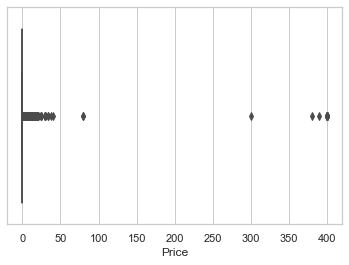

In [89]:
#ploting a box plot for checking is therte any outlier or not
sns.set_theme(style="whitegrid")
sns.boxplot(x=data['Price'])

    ii.Do you expect apps on the play store to cost $200? Check out these cases

In [90]:
data.loc[data['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,16-Jul-18,1,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,11-Mar-18,1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,3-May-18,1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,12-Jan-18,2,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,19-May-18,3,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,21-Jul-18,1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,12-Nov-17,1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,1-Jul-18,1,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,11-Dec-17,1,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,1-May-17,3.4,4.4 and up


    iii. After dropping the useless records, make the suitable plot again to identify outliers

<AxesSubplot:xlabel='Price'>

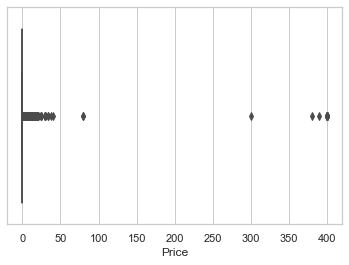

In [91]:
#after doing Changes checking plot for outliers
sns.set_theme(style="whitegrid")
sns.boxplot(x=data['Price'])

    iv. Limit data to records with price < $30

In [92]:
#limiting data to only 30$ only
Pric30=data[data['Price']>30].index
data.drop(labels=Pric30,inplace=True)


In [93]:
#cheking is there any record with lessthan 30 $
count=data.loc[data['Price']>30].index
count.value_counts().sum()

0

  B. Reviews column 

    i. Make suitable plot

<AxesSubplot:xlabel='Reviews'>

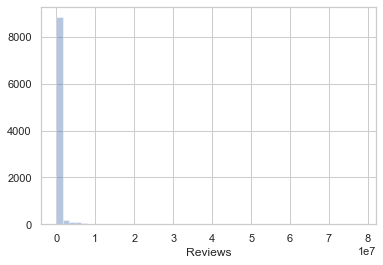

In [94]:
#ploting a distplot foe Reviews column(series) and using theme ticks
sns.set_theme(style="whitegrid")
sns.distplot(data['Reviews'] , kde=False)

    ii. Limit data to apps with < 1 Million reviews

In [95]:
#finding and droping apps with less than 1 mil reviews
mil=data[data['Reviews']>1000000].index
data.drop(labels=mil,inplace=True)
newdataframe=df[df['reviews']]

In [96]:
#checking is there any app with lessthan 1mil reviews
count=data.loc[data['Reviews']>10000000].index
count.value_counts().sum()

0

  C. Installs

    i. What is the 95th percentile of the installs?

In [97]:
#printing the 95 persentile of the install column
Q95=data['Installs'].quantile(0.95)
Q95

10000000.0

    ii. Drop records having a value more than the 95th percentile

In [98]:
#Droping the apps whose installs are more than 95 Persentile
Q9=data[data['Installs']>Q95].index
data.drop(labels=Q9,inplace=True)

In [99]:
#checking is there any apps with more than 95 persentile  Installs
count=data.loc[data['Installs']>Q95].index
count.value_counts().sum()

0

# Data analysis to answer business questions

### 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

  A. How do you explain this?

The skeweness of the Rating plot is  -1.7434270330647985
The Median of this distribution 4.3 is greater than mean 4.170800237107298 of this distribution


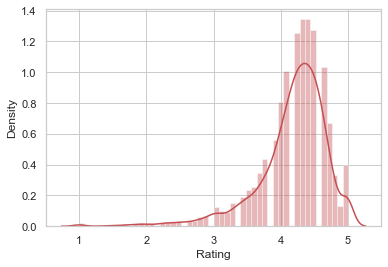

In [100]:
sns.distplot(data['Rating'],color='r')
ske=data['Rating'].skew()
print('The skeweness of the Rating plot is ',ske)
print('The Median of this distribution {} is greater than mean {} of this distribution'
      .format(data.Rating.median(),data.Rating.mean()))
plt.show()

    b. What is the implication of this on your analysis?

In [101]:
data['Rating'].mode()

0    4.3
dtype: float64

###  6. What are the top Content Rating values?

  A. Are there any values with very few records?

In [102]:
data['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

    There is Adults only 18+ and Unrated are values with very few records so we are droping them

  B. If yes, drop those as they won’t help in the analysis

In [103]:
#replacing adults 18+ and unrated with NaN
temp = []
for i in data['Content Rating']:
    temp.append(i.replace('Adults only 18+','NaN').replace('Unrated','NaN'))

data['Content Rating']=temp

In [104]:
# Droping the NaN values.
temp2 = data[data["Content Rating"] == 'NaN'].index
data.drop(labels=temp2, inplace=True)

In [105]:
#cheking the Counts of content rating column
data['Content Rating'].value_counts()

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

### 7. Effect of size on rating

  A. Make a joinplot to understand the effect of size on rating

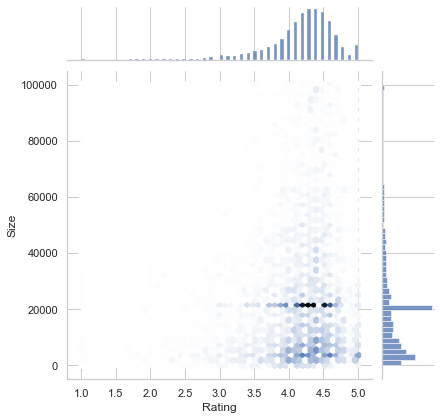

In [106]:
#ploting the jaoint plot for size vs ratings
sns.jointplot(y ='Size', x ='Rating', data = data, kind ='hex')
plt.show()

B. Do you see any patterns?

* Yes, there is a pattern between size and Ratings .
* That is at 20000bits and 4.0 to 4.5 ratings there is correlation in size in ratings.

C. How do you explain the pattern?

* When the Rating is increasing then the size of apps also increasing.
* but for the Rating when the rating is higher there is constant size.

### 8. Effect of price on rating

  A. Make a jointplot (with regression line)

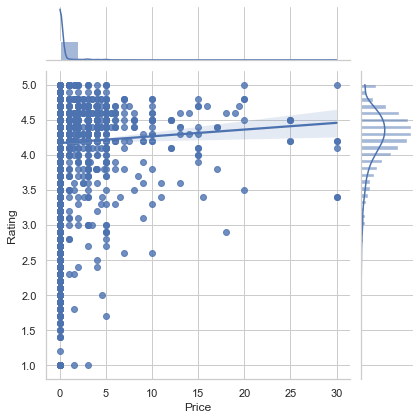

In [107]:
#ploting the jointplot foe price vs Ratings
sns.jointplot(x='Price', y='Rating', data=data, kind='reg')
plt.show()

  B. What pattern do you see?

* When the increasing of price ,Ratings are almost same there isnt any changes

C. How do you explain the pattern?

* When Price is increasing, Rating remains almost constant greater than 3.5. 
* So it can be concluded that their is very weak Positive correlation between Rating and Price

In [108]:
data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.158547,0.058076,0.118414,0.031479
Reviews,0.158547,1.000000,0.204667,0.736038,-0.073446
Size,0.058076,0.204667,1.000000,0.190741,-0.001054
Installs,0.118414,0.736038,0.190741,1.000000,-0.110507
Price,0.031479,-0.073446,-0.001054,-0.110507,1.000000


  D. Replot the data, this time with only records with price > 0

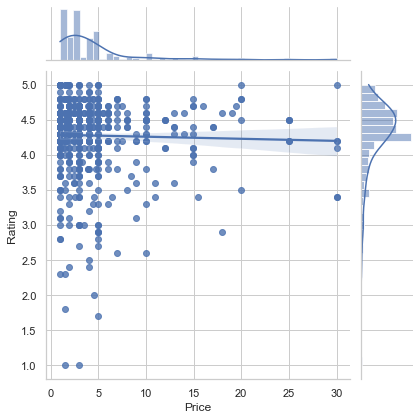

In [109]:
price0=data.loc[data.Price>0]
sns.jointplot(x='Price', y='Rating', data=price0, kind='reg')
plt.show()

  E. Does the pattern change?

* Yes, On limiting the record with Price > 0, 
* the overall pattern changed a slight ie their is very weakly Negative Correlation between Price and Rating.

  F. What is your overall inference on the effect of price on the rating

* So increasing the Prices, doesn't have signifcant effect on Higher Rating.
* For Higher Price, Rating is High and almost constant and greater than 3.5.

### 9. Look at all the numeric interactions together –

  A. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

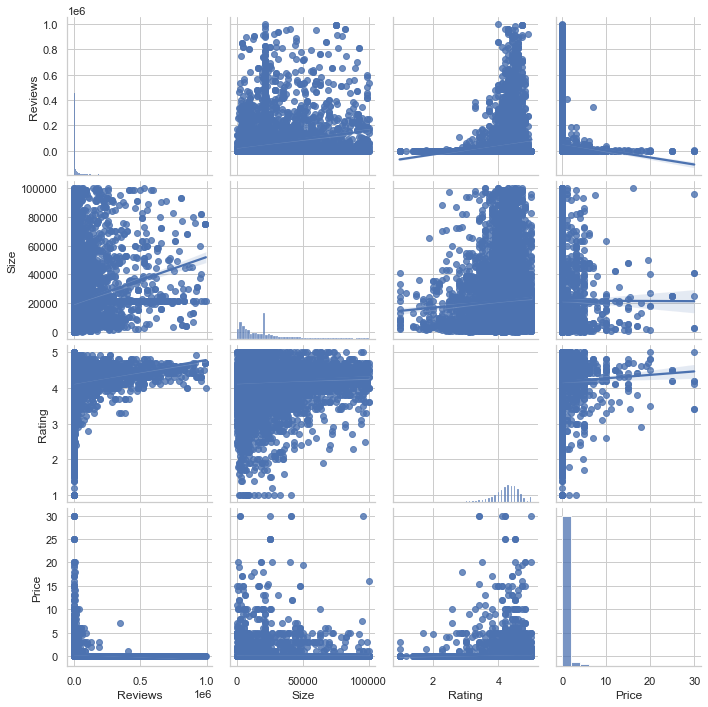

In [110]:
#ploting the pairplot for reviews ,size,Rating and Price
sns.pairplot(data, vars=['Reviews', 'Size', 'Rating', 'Price'], kind='reg')
plt.show()

### 10. Rating vs. content rating

  a. Make a bar plot displaying the rating for each content rating

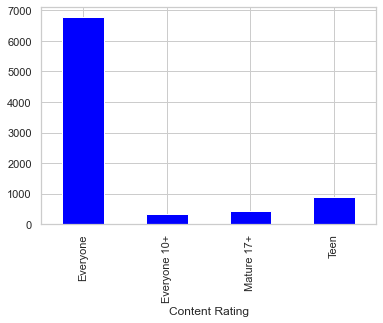

In [111]:
#ploting a bar plot and taking count of the Content ratings in x axis
data.groupby(['Content Rating'])['Rating'].count().plot.bar(color='blue')
plt.show()

  B. Which metric would you use? Mean? Median? Some other quantile?

* We can use Median in this case as we are having Outliers in Rating columns.
* Because in case of Outliers , median is the best measure of central tendency.

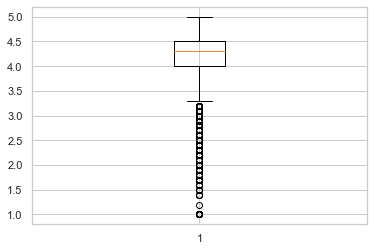

In [112]:
plt.boxplot(data['Rating'])
plt.show()

  c. Choose the right metric and plot

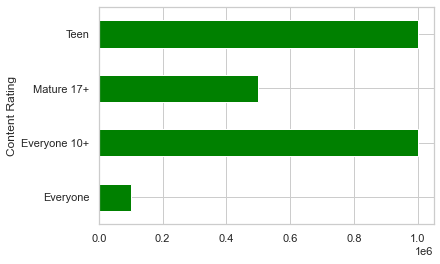

In [113]:
#Ploting the Barpolt for Content ratings vs Ratings
data.groupby(["Content Rating"])['Installs'].median().plot.barh(color="Green")
plt.show()

###  11. Content rating vs. size vs. rating – 3 variables at a time

  A. Create 5 buckets (20% records in each) based on Size

In [118]:
#Dividing the data into 5 parts 20K each and ploting them with content rating
bins=[0,20000, 40000, 60000, 80000, 100000]
data['Bucket Size'] = pd.cut(data['Size'], bins, labels=['0k=20k','20k-40k','40k-60k','60k-80k','80k-100k'])
temp=pd.pivot_table(data, values='Rating', index='Bucket Size', columns='Content Rating')
temp

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0k=20k,4.145730,4.247561,4.010582,4.182240
20k-40k,4.200195,4.169811,4.156291,4.170432
40k-60k,4.167083,4.263636,4.190476,4.237383
60k-80k,4.245408,4.280769,4.200000,4.274194
80k-100k,4.260127,4.304762,4.252632,4.270313


  b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [119]:
#printing the 20th persentile for each part
persentile=data['Installs'].quantile(0.2)
persentile

5000.0

  C. Make a heatmap of this

    i. Annotated

<AxesSubplot:xlabel='Content Rating', ylabel='Bucket Size'>

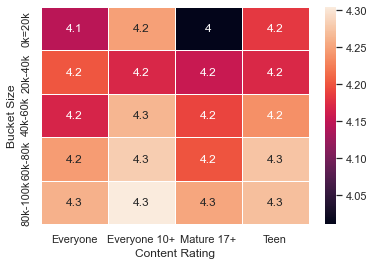

In [121]:
sns.heatmap(temp, annot=True, linewidths=.5)

    ii. Greens color map

<AxesSubplot:xlabel='Content Rating', ylabel='Bucket Size'>

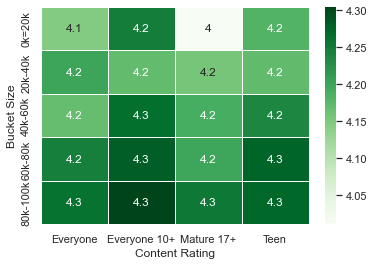

In [123]:
sns.heatmap(temp, annot=True, linewidths=.5,cmap='Greens')

  d. What’s your inference? Are lighter apps preferred in all    categories? Heavier? Some?

=>In general we can counclude that heavier apps are prefferred in all categories